Case 1 of Master Theorem. 

Here, a=3 and b=2. 



In [5]:
import random as rnd
import time
import math
import matplotlib.pyplot as plt
from statistics import mean
import numpy
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

<function matplotlib.pyplot.show(close=None, block=None)>

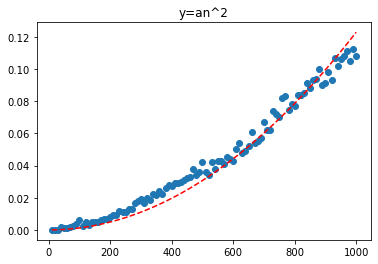

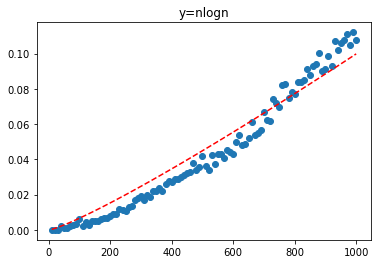

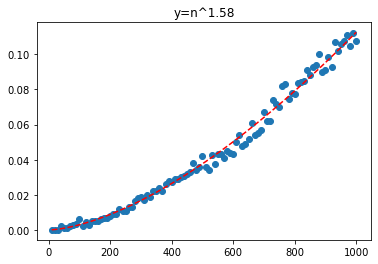

In [7]:
inp_sizes = []
for i in range(100):
    inp_sizes.append(10*(i+1))

import math
def cmbn(A,B): #Function to combine two sequences(sorted) into a single sorted sequence

    C=[]
    while(len(A)>0 or len(B)>0):
        if(len(A)==0 and len(B)>0):
            C.append(B[0])
            B.pop(0)
            
        if(len(B)==0 and len(A)>0):
            C.append(A[0])
            A.pop(0)
            

        if(len(A)>0 and len(B)>0 and A[0]<B[0]): #The smallest between the first elements of A and B is appended to C
            C.append(A[0]) #The element appended is deleted from original array passed to the function
            A.pop(0)
        else:
            if(len(B)>0):

                C.append(B[0])
                B.pop(0)
    return C


def merge_sort(A,l,r):
    if(l<=r):

        if(l==r):
            C=[]
            C.append(A[l])
            return C
        
        if((l==r-1) and r<len(A)):
            C=[]
            C.append(min(A[l],A[r]))
            C.append(max(A[l],A[r]))
            return C
        
        m=math.floor(l+(r-l+1)/2)
        #Now the array is divided into two halves, the halves are sorted individually and merged into one single sorted array
        if(m==r):
            B=merge_sort(A,l,m-1) #left half
        else:
            B=merge_sort(A,l,m) 
        C=merge_sort(A,m+1,r)  #right half 
        m1=math.floor(l+(m-l+1)/2)
        m2=math.floor(m+(r-m+1)/2) 
        D=merge_sort(A,m1,m2)
        E=cmbn(B,C) #Calling the combining function with only B and C, since B and C combined contain all elements
                    #D contains repeated elements. 
        return E
########
times=[]
for n in inp_sizes:
    arr=[]
    for i in range(n):
        arr.append(rnd.randint(-10000,10000))
    test_time=[]
    for tests in range(5):
            start=time.time()
            merge_sort(arr,0,n-1) 
            test_time.append(time.time()-start)
    times.append(mean(test_time))
########
def quadratic(x, a):
    return a * x**2 

def logarithmic(x,a):
    return a*x*numpy.log2(x)

def special(x,a):
    return a*x**(1.58)

x,y=inp_sizes,times

########
parameters,_ = curve_fit(quadratic,x,y)
a = parameters
x1=arange(min(inp_sizes),max(inp_sizes)+10,10)
y1=[]
for j in inp_sizes:
    y1.append(quadratic(j,a))

########
d,_ = curve_fit(logarithmic,x,y)
x2=x1
y2=[]
for j in inp_sizes:
    y2.append(logarithmic(j,d))

########
parameters,_ = curve_fit(special,x,y)
e=parameters
x3=x1
y3=[]
for j in inp_sizes:
    y3.append(special(j,e))
    
########    
p1=plt.figure(1)   
plt.plot(x1,y1,'--',color = 'red')
plt.title("y=an^2")
plt.scatter(x,y)
########
p2=plt.figure(2)
plt.plot(x2,y2,'--',color='red')
plt.title("y=nlogn")
plt.scatter(x,y)
########
p3=plt.figure(3)
plt.plot(x3,y3,'--',color='red')
plt.title("y=n^1.58")
plt.scatter(x,y)

plt.show
    